In [53]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt
from cycler import cycler

In [54]:
# Set plotting style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)
cmap = plt.get_cmap('Set2')
colors = plt.get_cmap('Set2').colors
plt.rcParams['axes.prop_cycle'] = cycler(color=colors)

plt.rcParams['axes.grid'] = False

In [55]:
# Load Data
df = pd.read_csv('../data/raw/data.csv', low_memory=False)
print(f"Dataset shape: {df.shape}")

Dataset shape: (49104, 41)


In [56]:
# Initial Data Inspection

df.head()

df.info()

# Check for missing values
print("\nMissing Values Analysis:")
print("=" * 50)
missing_values = df.isnull().sum()
missing_percent = (df.isnull().sum() / len(df)) * 100

missing_df = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage (%)': missing_percent
})
missing_df = missing_df[missing_df['Missing Values'] > 0].sort_values('Missing Values', ascending=False)

if missing_df.empty:
    print("No missing values found!")
else:
    print(missing_df)

# Check for duplicate rows
duplicates = df.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicates}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49104 entries, 0 to 49103
Data columns (total 41 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   session_id                      49104 non-null  object 
 1   user_id                         49104 non-null  int64  
 2   trip_id                         16595 non-null  object 
 3   session_start                   49104 non-null  object 
 4   session_end                     49104 non-null  object 
 5   flight_discount                 49104 non-null  bool   
 6   hotel_discount                  49104 non-null  bool   
 7   flight_discount_amount          8266 non-null   float64
 8   hotel_discount_amount           6188 non-null   float64
 9   flight_booked                   49104 non-null  bool   
 10  hotel_booked                    49104 non-null  bool   
 11  page_clicks                     49104 non-null  int64  
 12  cancellation                    

In [57]:
total_sessions = len(df)

booked_sessions = df[(df['flight_booked']) | (df['hotel_booked'])].shape[0]

# Conversion Rate
conversion_rate = booked_sessions / total_sessions

print(f"Total Sessions: {total_sessions}")
print(f"Booked Sessions: {booked_sessions}")
print(f"Conversion Rate: {conversion_rate:.2%}")

Total Sessions: 49104
Booked Sessions: 16595
Conversion Rate: 33.80%


In [58]:
# Discount Impact
discount_sessions = df[df['flight_discount'] == True]
discount_conversion = discount_sessions[(discount_sessions['flight_booked'] == True) | (discount_sessions['hotel_booked'] == True)].shape[0] / len(discount_sessions)
print(f"Conversion with Discount: {discount_conversion:.2%}")

Conversion with Discount: 33.74%


In [59]:
no_discount_sessions = df[df['flight_discount'] == False]
no_discount_conversion = no_discount_sessions[(no_discount_sessions['flight_booked']) | (no_discount_sessions['hotel_booked'])].shape[0] / len(no_discount_sessions)
print(f"Conversion without Discount: {no_discount_conversion:.2%}")

Conversion without Discount: 33.81%


In [60]:
# Flight Discount
flight_discount_sessions = df[df['flight_discount'] == True]
flight_discount_conversion = flight_discount_sessions[
    (flight_discount_sessions['flight_booked']) | (flight_discount_sessions['hotel_booked'])
].shape[0] / len(flight_discount_sessions)

flight_no_discount_sessions = df[df['flight_discount'] == False]
flight_no_discount_conversion = flight_no_discount_sessions[
    (flight_no_discount_sessions['flight_booked']) | (flight_no_discount_sessions['hotel_booked'])
].shape[0] / len(flight_no_discount_sessions)

# Hotel Discount
hotel_discount_sessions = df[df['hotel_discount'] == True]
hotel_discount_conversion = hotel_discount_sessions[
    (hotel_discount_sessions['flight_booked']) | (hotel_discount_sessions['hotel_booked'])
].shape[0] / len(hotel_discount_sessions)

hotel_no_discount_sessions = df[df['hotel_discount'] == False]
hotel_no_discount_conversion = hotel_no_discount_sessions[
    (hotel_no_discount_sessions['flight_booked']) | (hotel_no_discount_sessions['hotel_booked'])
].shape[0] / len(hotel_no_discount_sessions)

# Result
print(f"Flight Discount Conversion: {flight_discount_conversion:.2%}")
print(f"Flight No Discount Conversion: {flight_no_discount_conversion:.2%}")
print(f"Hotel Discount Conversion: {hotel_discount_conversion:.2%}")
print(f"Hotel No Discount Conversion: {hotel_no_discount_conversion:.2%}")

Flight Discount Conversion: 33.74%
Flight No Discount Conversion: 33.81%
Hotel Discount Conversion: 41.49%
Hotel No Discount Conversion: 32.56%


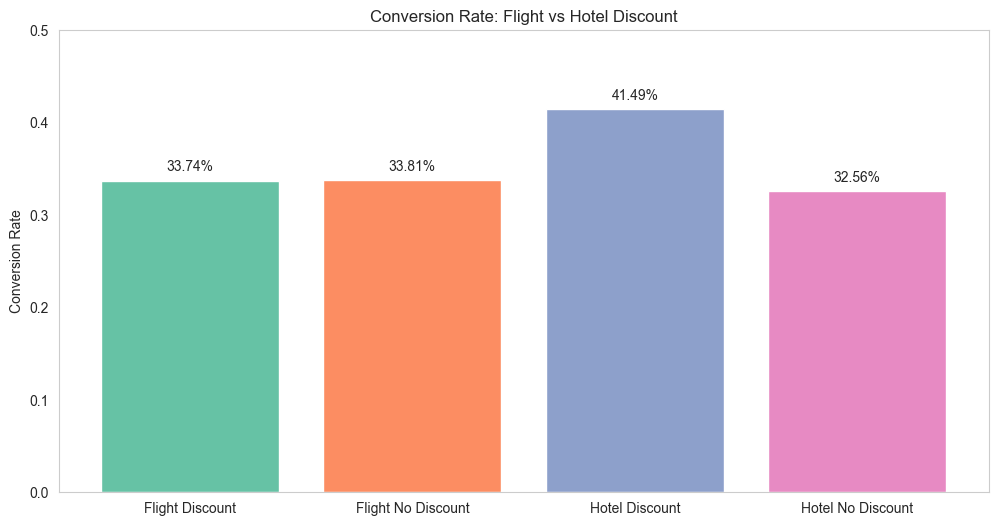

In [61]:
# Conversion-Impact Discounts
categories = ['Flight Discount', 'Flight No Discount', 'Hotel Discount', 'Hotel No Discount']

values = [flight_discount_conversion, flight_no_discount_conversion, hotel_discount_conversion, hotel_no_discount_conversion]

plt.bar(categories, values, color=colors[:len(categories)])
plt.ylabel('Conversion Rate')
plt.ylim(0, 0.5)
plt.title('Conversion Rate: Flight vs Hotel Discount')


# Percent
for i, v in enumerate(values):
    plt.text(i, v + 0.01, f"{v*100:.2f}%", ha='center', fontweight='regular')

plt.show()

In [62]:
# sum of missing values
print(df[['flight_discount_amount', 'hotel_discount_amount']].isna().sum())

flight_discount_amount    40838
hotel_discount_amount     42916
dtype: int64


In [63]:
# Flight
missing_flight_discount_amount = df[(df['flight_discount'] == True) & (df['flight_discount_amount'].isna())]
print(f"Flight Discount without flight_discount_amount: {len(missing_flight_discount_amount)}")

# Hotel
missing_hotel_discount_amount = df[(df['hotel_discount'] == True) & (df['hotel_discount_amount'].isna())]
print(f"Hotel Discount without hotel_discount_amount: {len(missing_hotel_discount_amount)}")

Flight Discount without flight_discount_amount: 608
Hotel Discount without hotel_discount_amount: 608


In [64]:
# convert dates to datetime
df['session_start'] = pd.to_datetime(df['session_start'])
df['session_end'] = pd.to_datetime(df['session_end'], format="mixed")
df['birthdate'] = pd.to_datetime(df['birthdate'])

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49104 entries, 0 to 49103
Data columns (total 41 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   session_id                      49104 non-null  object        
 1   user_id                         49104 non-null  int64         
 2   trip_id                         16595 non-null  object        
 3   session_start                   49104 non-null  datetime64[ns]
 4   session_end                     49104 non-null  datetime64[ns]
 5   flight_discount                 49104 non-null  bool          
 6   hotel_discount                  49104 non-null  bool          
 7   flight_discount_amount          8266 non-null   float64       
 8   hotel_discount_amount           6188 non-null   float64       
 9   flight_booked                   49104 non-null  bool          
 10  hotel_booked                    49104 non-null  bool          
 11  pa

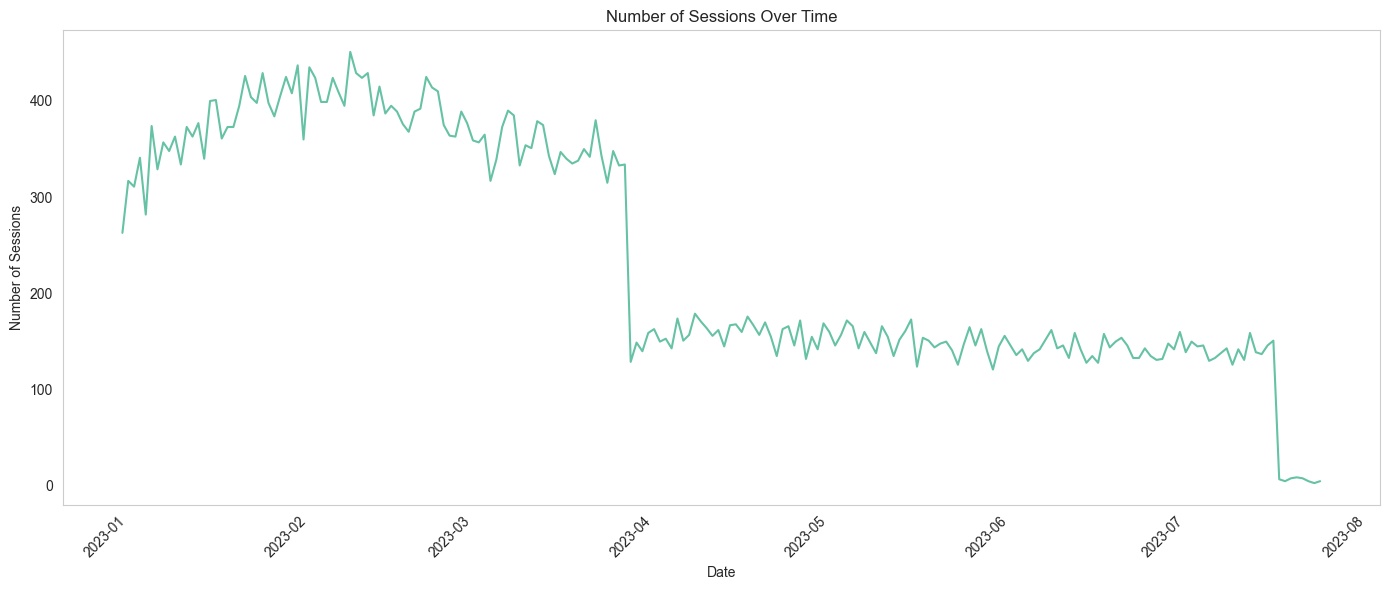

In [67]:
# Session Date Analysis
# Convert session_start to datetime
df['session_date'] = df['session_start'].dt.date

# Plot sessions over time
daily_sessions = df['session_date'].value_counts().sort_index()

plt.figure(figsize=(14, 6))
daily_sessions.plot()
plt.title('Number of Sessions Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Sessions')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<Axes: title={'center': 'Sessions Over Time'}, xlabel='session_start'>

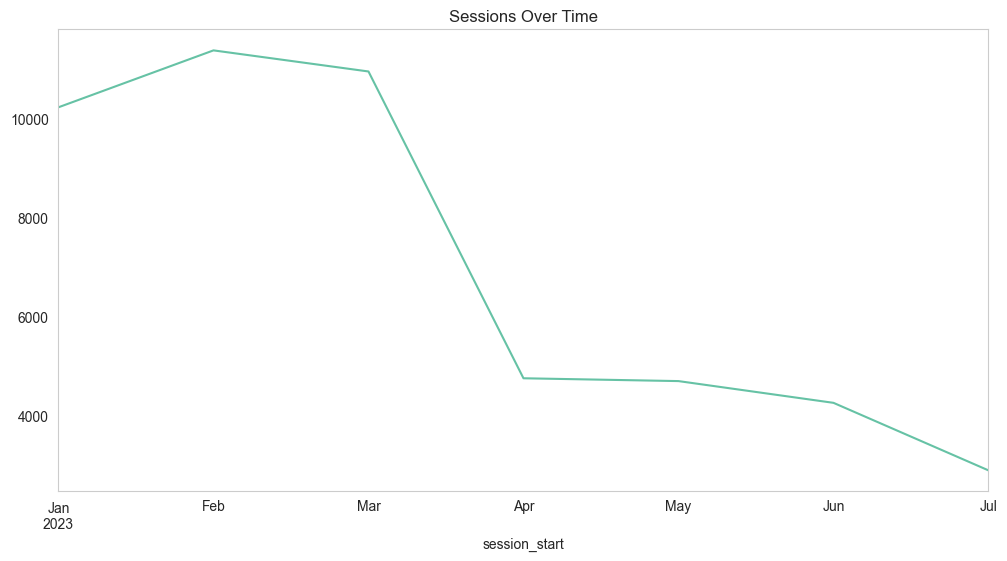

In [ ]:
# Sessions over time by month
df_sessions = df.groupby(df['session_start'].dt.to_period('M')).size()
df_sessions.plot(title="Sessions Over Time")

weekday
Friday       2361
Monday       2342
Saturday     2317
Sunday       2427
Thursday     2421
Tuesday      2268
Wednesday    2459
Name: count, dtype: int64


/var/folders/n0/4xfyfrnd1wj35c4v3fsvg9sh0000gn/T/ipykernel_16073/3705337100.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  booked_sessions['weekday'] = booked_sessions['session_start'].dt.day_name()


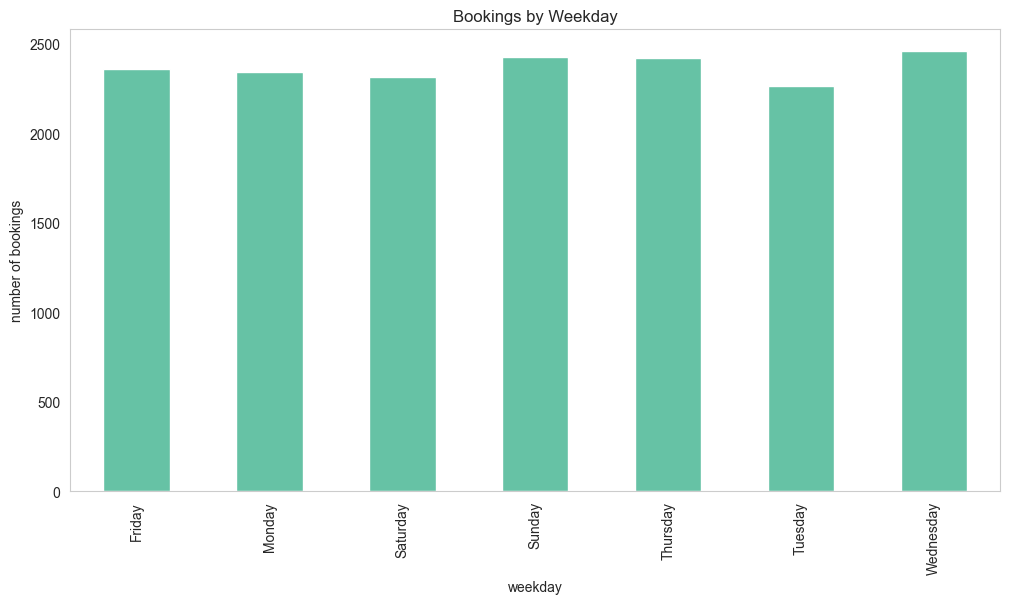

In [ ]:
booked_sessions = df[(df['flight_booked']) | (df['hotel_booked'])]

booked_sessions['weekday'] = booked_sessions['session_start'].dt.day_name()
bookings_by_weekday = booked_sessions['weekday'].value_counts().sort_index()
print(bookings_by_weekday)

bookings_by_weekday.plot(kind='bar')
plt.ylabel('number of bookings')
plt.title('Bookings by Weekday')
plt.show()

/var/folders/n0/4xfyfrnd1wj35c4v3fsvg9sh0000gn/T/ipykernel_16073/1805066823.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  booked_sessions['hour'] = booked_sessions['session_start'].dt.hour


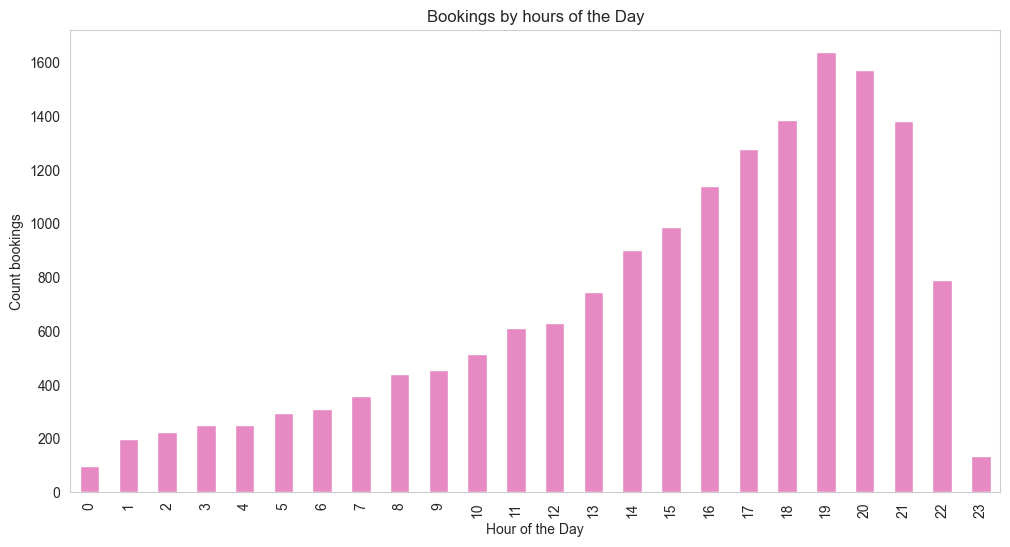

In [ ]:
booked_sessions['hour'] = booked_sessions['session_start'].dt.hour
bookings_by_hour = booked_sessions['hour'].value_counts().sort_index()

bookings_by_hour.plot(kind='bar', color=colors[3])
plt.xlabel('Hour of the Day')
plt.ylabel('Count bookings')
plt.title('Bookings by hours of the Day')
plt.show()

/var/folders/n0/4xfyfrnd1wj35c4v3fsvg9sh0000gn/T/ipykernel_52058/780002302.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  booked_sessions['month'] = booked_sessions['session_start'].dt.month


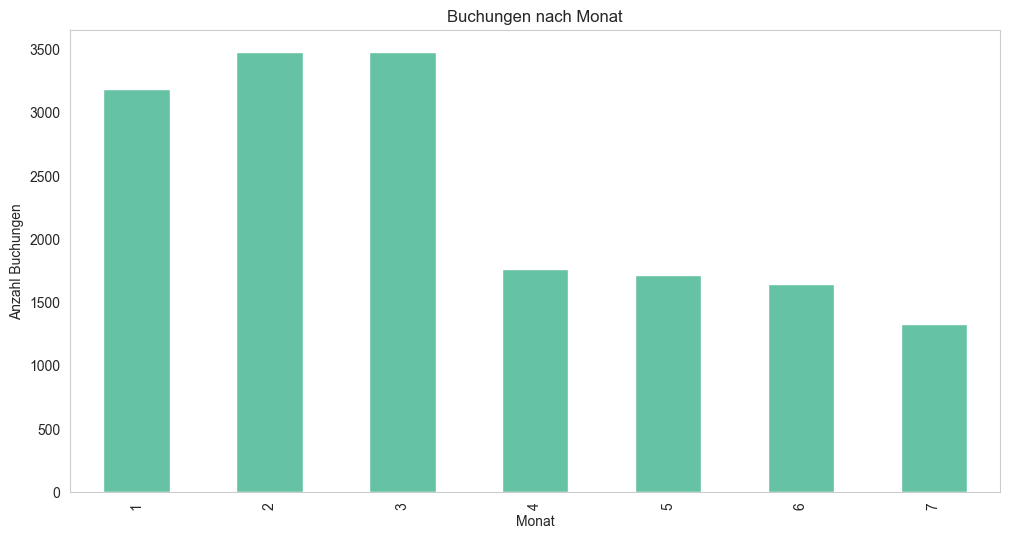

In [ ]:
booked_sessions['month'] = booked_sessions['session_start'].dt.month
bookings_by_month = booked_sessions['month'].value_counts().sort_index()

bookings_by_month.plot(kind='bar', color=colors[0])
plt.xlabel('Monat')
plt.ylabel('Anzahl Buchungen')
plt.title('Buchungen nach Monat')
plt.show()

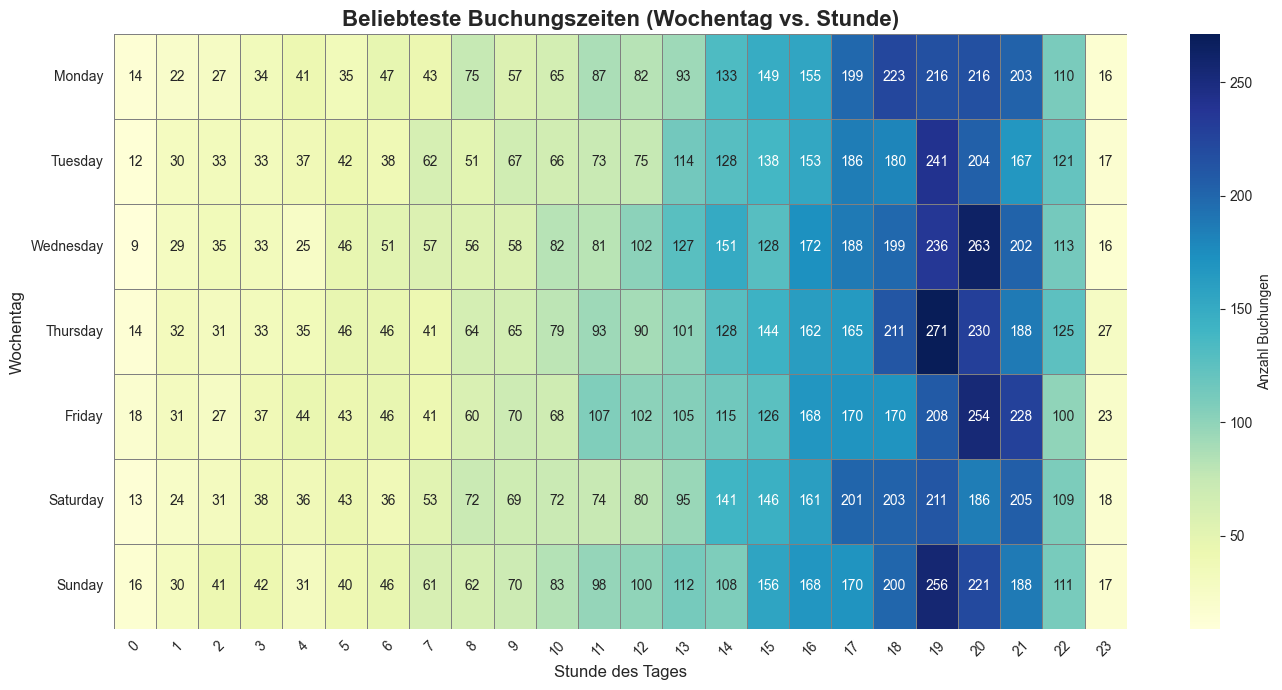

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Filter nur gebuchte Sessions
booked_sessions = df[(df['flight_booked']) | (df['hotel_booked'])].copy()
booked_sessions['session_start'] = pd.to_datetime(booked_sessions['session_start'])

# Wochentag und Stunde extrahieren
booked_sessions['weekday'] = booked_sessions['session_start'].dt.day_name()
booked_sessions['hour'] = booked_sessions['session_start'].dt.hour

# Pivot-Tabelle: Zeilen = Wochentag, Spalten = Stunde, Werte = Anzahl Buchungen
heatmap_data = booked_sessions.pivot_table(
    index='weekday',
    columns='hour',
    values='session_start',
    aggfunc='count'
)

# Wochentage sortieren
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
heatmap_data = heatmap_data.reindex(weekday_order)

# Heatmap plotten – schöneres Styling
plt.figure(figsize=(14,7))
sns.set_style("whitegrid")
sns.heatmap(
    heatmap_data,
    cmap="YlGnBu",
    annot=True,
    fmt='.0f',
    linewidths=0.5,
    linecolor='gray',
    cbar_kws={'label': 'Anzahl Buchungen'}
)
plt.title('Beliebteste Buchungszeiten (Wochentag vs. Stunde)', fontsize=16, fontweight='bold')
plt.xlabel('Stunde des Tages', fontsize=12)
plt.ylabel('Wochentag', fontsize=12)
plt.yticks(rotation=0)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

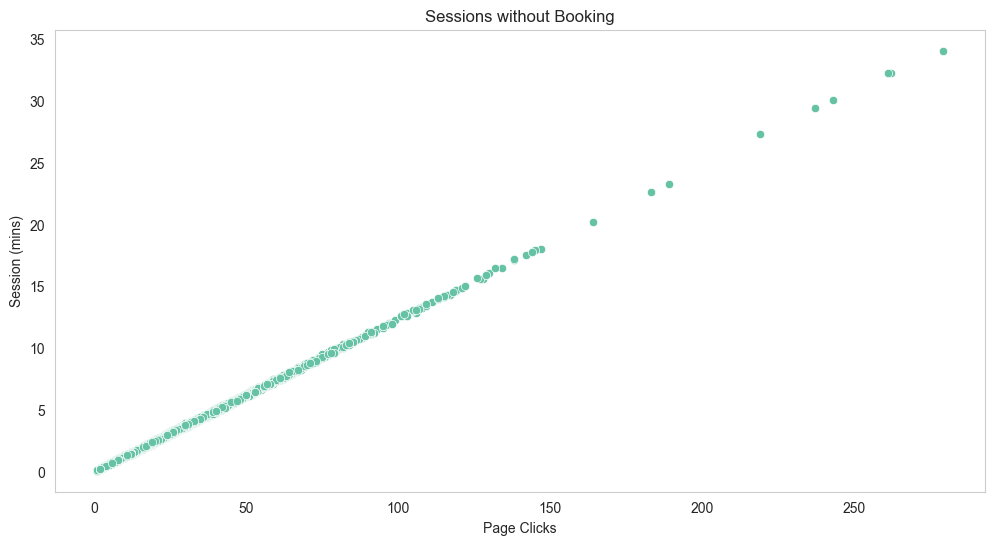

In [ ]:
no_booking_sessions = df[(df['flight_booked']==False) & (df['hotel_booked']==False)].copy()

no_booking_sessions['session_duration_min'] = (
    no_booking_sessions['session_end'] - no_booking_sessions['session_start']
).dt.total_seconds() / 60


sns.scatterplot(
    data=no_booking_sessions,
    x='page_clicks',
    y='session_duration_min'
)
plt.xlabel('Page Clicks')
plt.ylabel('Session (mins)')
plt.title('Sessions without Booking')
plt.show()


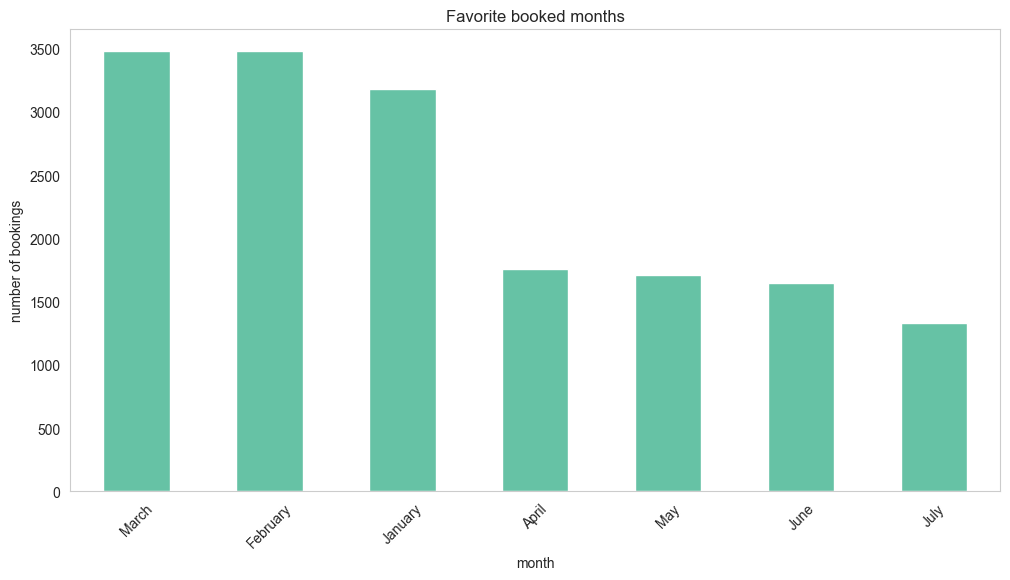

In [ ]:
df['booking_month'] = df['session_start'].dt.month_name()

# Buchungen zählen (nur wenn flight_booked oder hotel_booked true ist)
booked_df = df[(df['flight_booked'] == True) | (df['hotel_booked'] == True)]
monthly_bookings = booked_df['booking_month'].value_counts()

# Plot

monthly_bookings.plot(kind="bar")
plt.title("Favorite booked months")
plt.xlabel("month")
plt.ylabel("number of bookings")
plt.xticks(rotation=45)
plt.show()

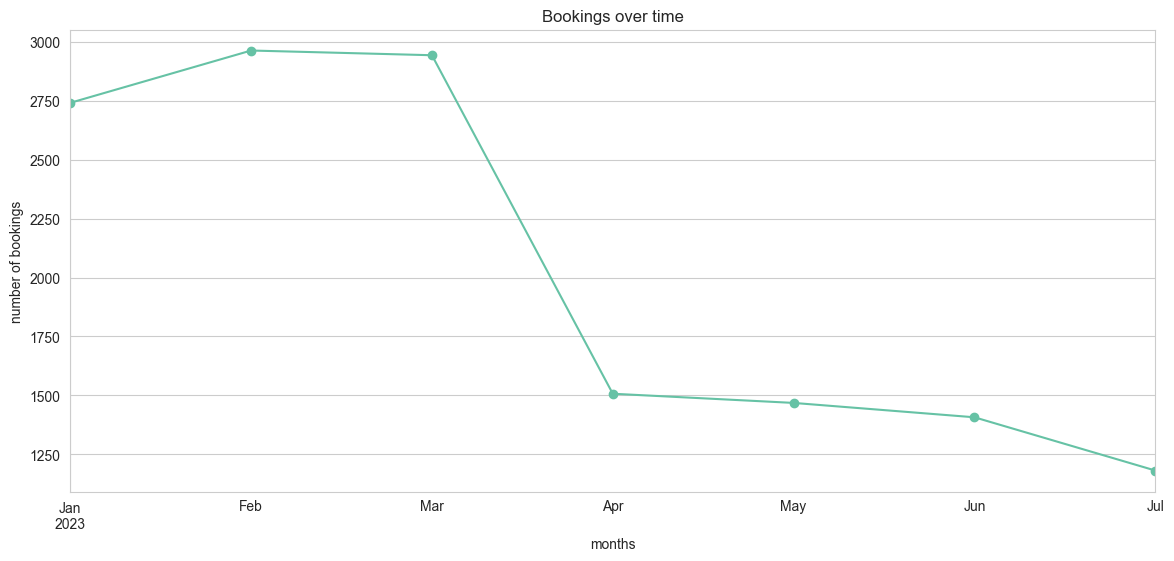

In [ ]:
df['year_month'] = df['session_start'].dt.to_period('M')

# bookings per month
time_series_bookings = df[df['flight_booked'] == True].groupby('year_month').size()

# Plot
plt.figure(figsize=(14, 6))
time_series_bookings.plot(kind='line', marker='o')
plt.title("Bookings over time")
plt.xlabel("months")
plt.ylabel("number of bookings")
plt.grid(True)
plt.show()

<Axes: xlabel='flight_booked', ylabel='page_clicks'>

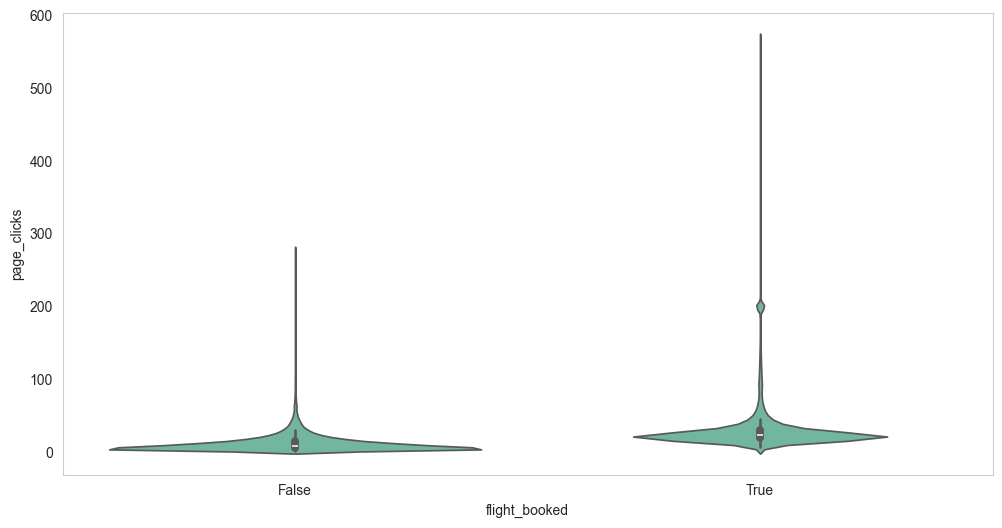

In [ ]:
sns.violinplot(x='flight_booked', y='page_clicks', data=df)

<Axes: xlabel='age', ylabel='Count'>

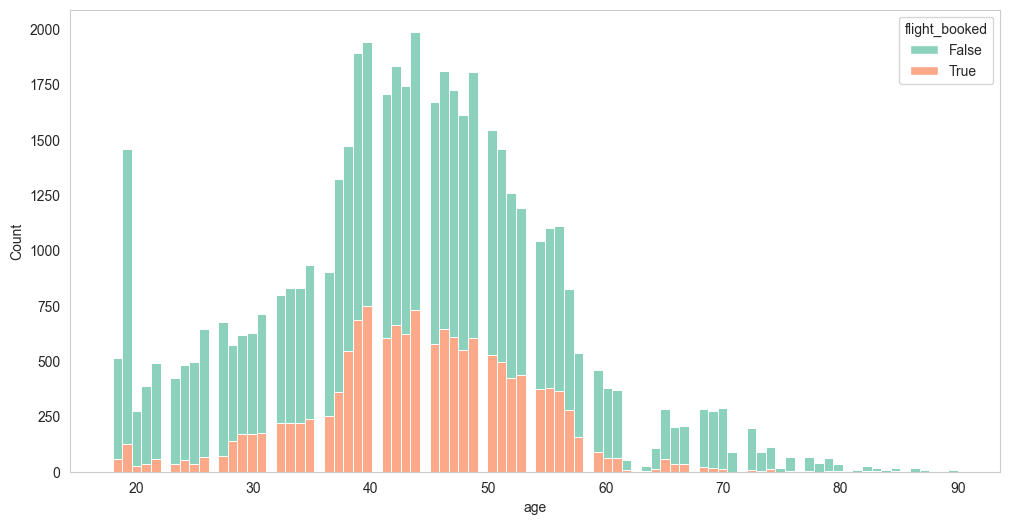

In [ ]:
df['age'] = (pd.to_datetime('today') - df['birthdate']).dt.days // 365
sns.histplot(data=df, x='age', hue='flight_booked', multiple='stack')

<Axes: xlabel='has_children'>

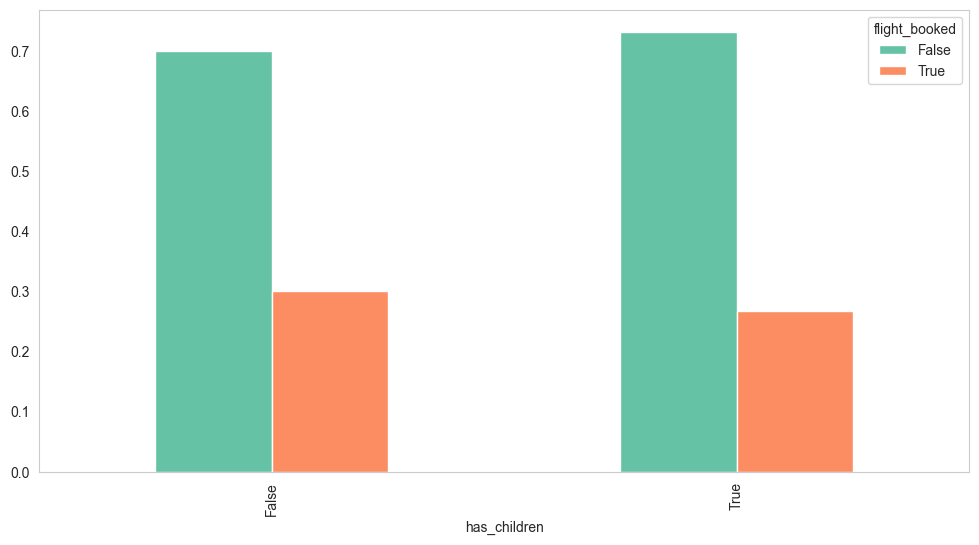

In [ ]:
df.groupby('has_children')['flight_booked'].value_counts(normalize=True).unstack().plot(kind='bar')

<Axes: xlabel='destination'>

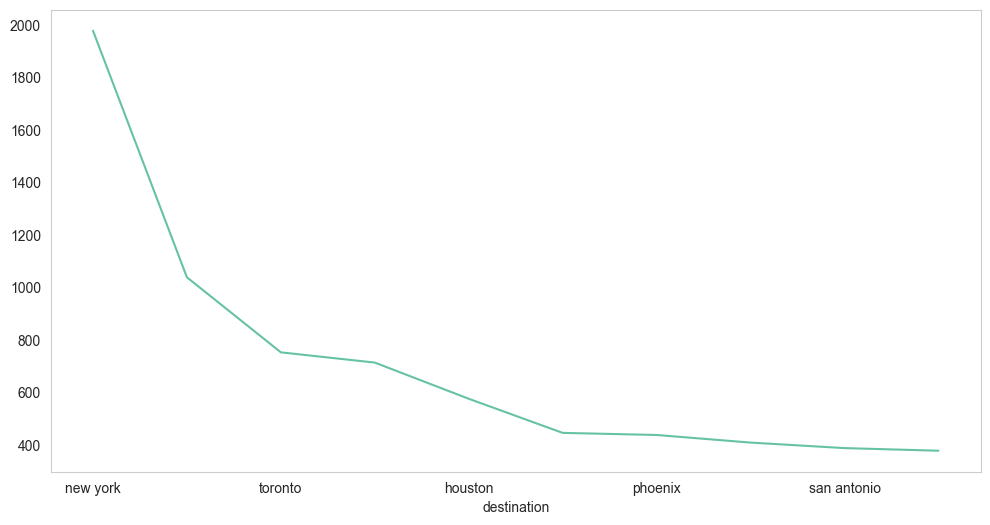

In [ ]:
top_destinations = df['destination'].value_counts().head(10)
top_destinations.plot()

<Axes: xlabel='nights', ylabel='Count'>

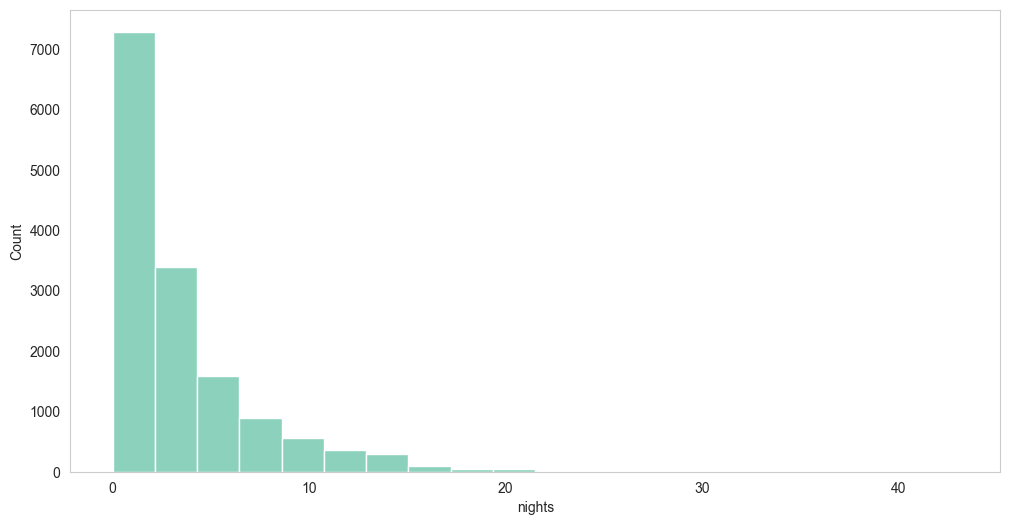

In [ ]:
sns.histplot(data=df, x='nights', bins=20)

<Axes: xlabel='booking_lead', ylabel='Count'>

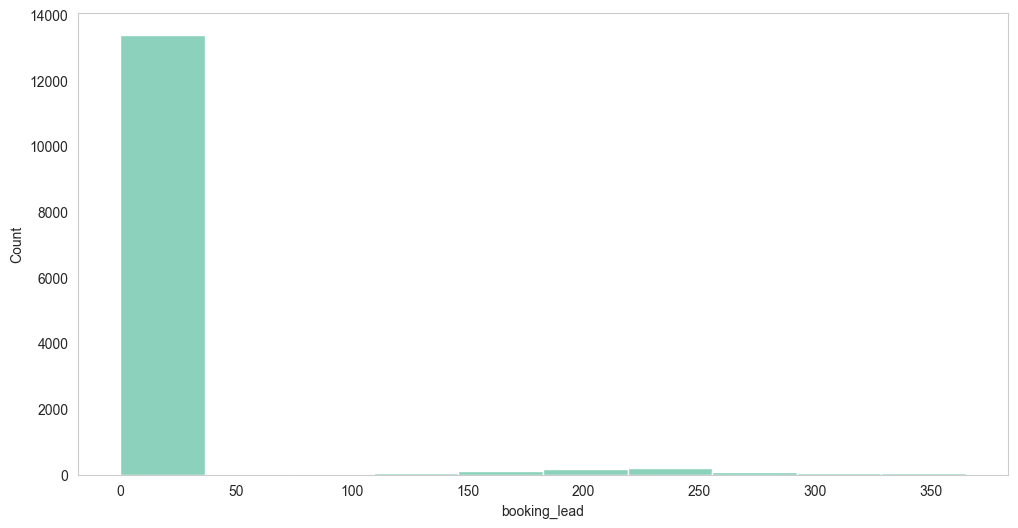

In [ ]:
df['booking_lead'] = (pd.to_datetime(df['departure_time']) - pd.to_datetime(df['session_start'])).dt.days
sns.histplot(data=df, x='booking_lead', bins=10)

In [ ]:
df.groupby('destination')['base_fare_usd'].mean().sort_values(ascending=False).head(10)

destination
colombo             14466.330000
xiamen              10202.410000
phuket               9483.035000
durban               8319.990000
ho chi minh city     7957.960000
agra                 7464.268889
bangalore            7274.800000
jakarta              6887.240000
chengdu              6661.200000
delhi                6231.233333
Name: base_fare_usd, dtype: float64

In [ ]:
df['route'] = df['origin_airport'] + ' -> ' + df['destination_airport']
df['route'].value_counts().head(10)

route
LAX -> JFK    75
LAX -> LGA    61
JFK -> LSQ    43
LGA -> LAX    42
JFK -> LAX    39
LGA -> LSQ    32
JFK -> YYC    31
DAL -> LGA    26
LGA -> DAL    25
SJC -> JFK    24
Name: count, dtype: int64

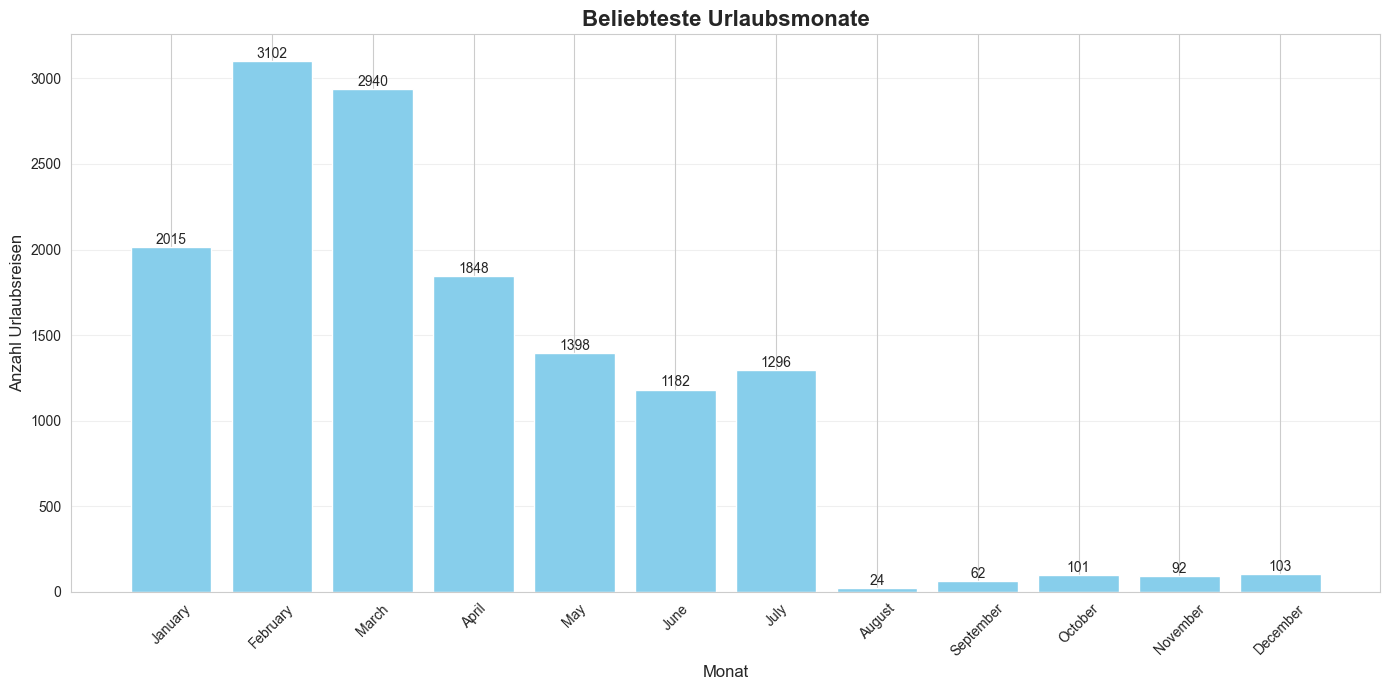

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Daten vorbereiten
df['departure_time'] = pd.to_datetime(df['departure_time'], errors='coerce')
df_urlaub = df.dropna(subset=['departure_time']).copy()
df_urlaub['urlaubs_monat'] = df_urlaub['departure_time'].dt.month_name()

# Anzahl Urlaube pro Monat zählen
urlaube_pro_monat = df_urlaub['urlaubs_monat'].value_counts()

# Monate in richtiger Reihenfolge sortieren
monate_ordnung = ['January', 'February', 'March', 'April', 'May', 'June',
                  'July', 'August', 'September', 'October', 'November', 'December']
urlaube_pro_monat = urlaube_pro_monat.reindex(monate_ordnung)

# Visualisierung
plt.figure(figsize=(14, 7))
bars = plt.bar(urlaube_pro_monat.index, urlaube_pro_monat.values, color='skyblue')
plt.title('Beliebteste Urlaubsmonate', fontsize=16, fontweight='bold')
plt.xlabel('Monat', fontsize=12)
plt.ylabel('Anzahl Urlaubsreisen', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)

# Werte auf den Balken anzeigen
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.1,
             f'{int(height)}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

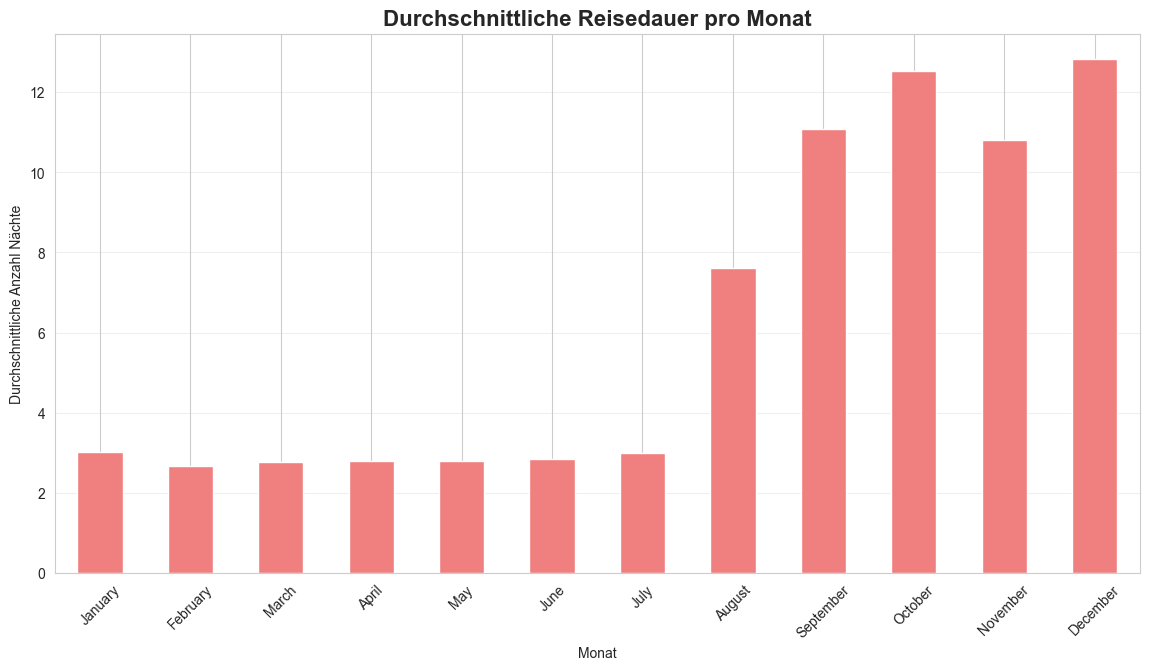

In [ ]:
# Durchschnittliche Reisedauer pro Monat
df_urlaub['nights'] = pd.to_numeric(df_urlaub['nights'], errors='coerce')
reisedauer_pro_monat = df_urlaub.groupby('urlaubs_monat')['nights'].mean().reindex(monate_ordnung)

plt.figure(figsize=(14, 7))
reisedauer_pro_monat.plot(kind='bar', color='lightcoral')
plt.title('Durchschnittliche Reisedauer pro Monat', fontsize=16, fontweight='bold')
plt.xlabel('Monat')
plt.ylabel('Durchschnittliche Anzahl Nächte')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.show()

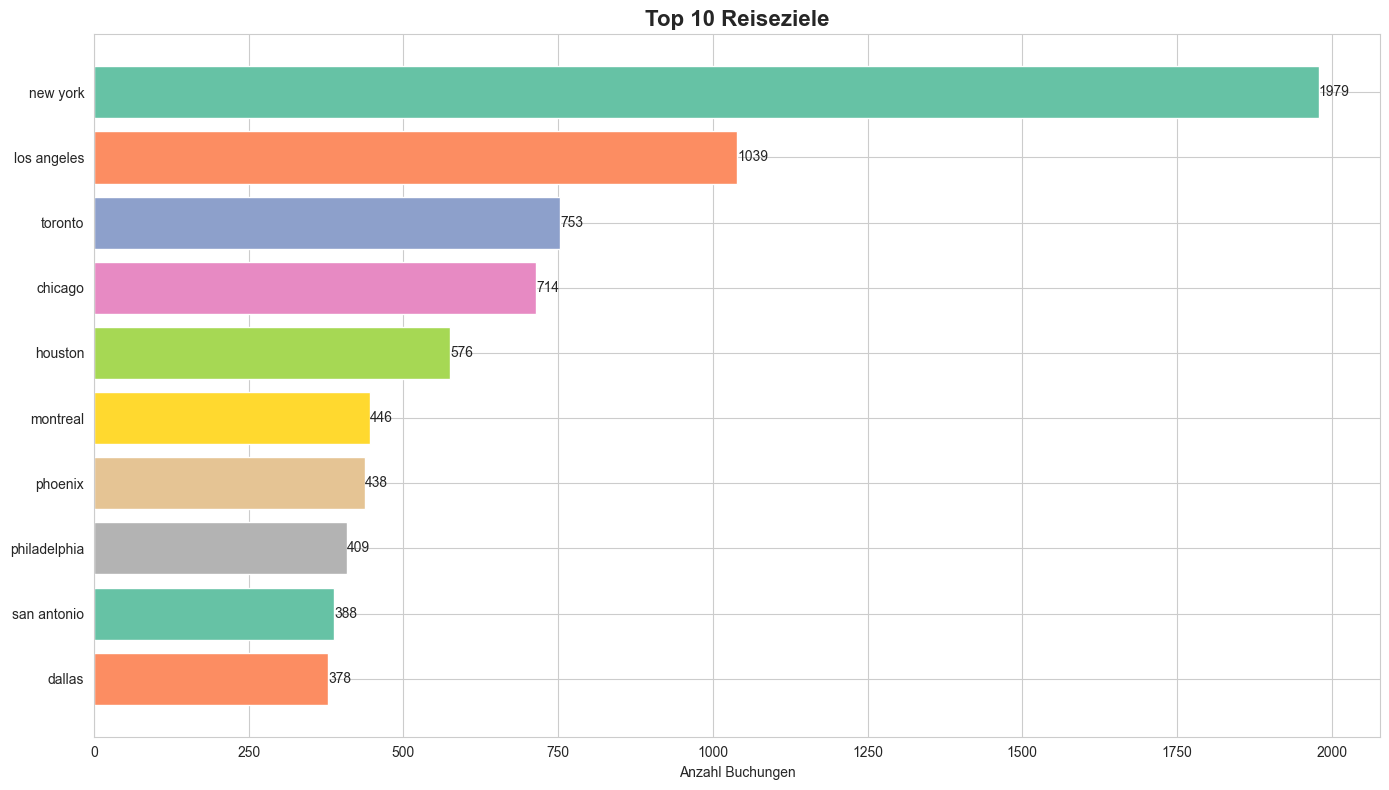

In [ ]:
# Top 10 Reiseziele
top_destinationen = df_urlaub['destination'].value_counts().head(10)

# Visualisierung
plt.figure(figsize=(14, 8))
bars = plt.barh(top_destinationen.index, top_destinationen.values, color=colors)
plt.title('Top 10 Reiseziele', fontsize=16, fontweight='bold')
plt.xlabel('Anzahl Buchungen')
plt.gca().invert_yaxis()  # Höchste Zahl oben

# Werte an den Balken anzeigen
for i, (wert, stadt) in enumerate(zip(top_destinationen.values, top_destinationen.index)):
    plt.text(wert + 0.1, i, f'{wert}', va='center')

plt.tight_layout()
plt.show()

In [ ]:
# Woher kommen die Touristen für die Top-Ziele?
top_3_ziele = top_destinationen.head(3).index.tolist()

for ziel in top_3_ziele:
    herkunft = df_urlaub[df_urlaub['destination'] == ziel]['home_city'].value_counts().head(5)
    print(f"\nTop 5 Herkunftsstädte für {ziel}:")
    for stadt, anzahl in herkunft.items():
        print(f"  {stadt}: {anzahl}")


Top 5 Herkunftsstädte für new york:
  los angeles: 136
  toronto: 102
  chicago: 89
  houston: 70
  montreal: 66

Top 5 Herkunftsstädte für los angeles:
  new york: 156
  toronto: 60
  houston: 40
  montreal: 36
  san antonio: 31

Top 5 Herkunftsstädte für toronto:
  new york: 104
  los angeles: 48
  chicago: 30
  montreal: 22
  houston: 20


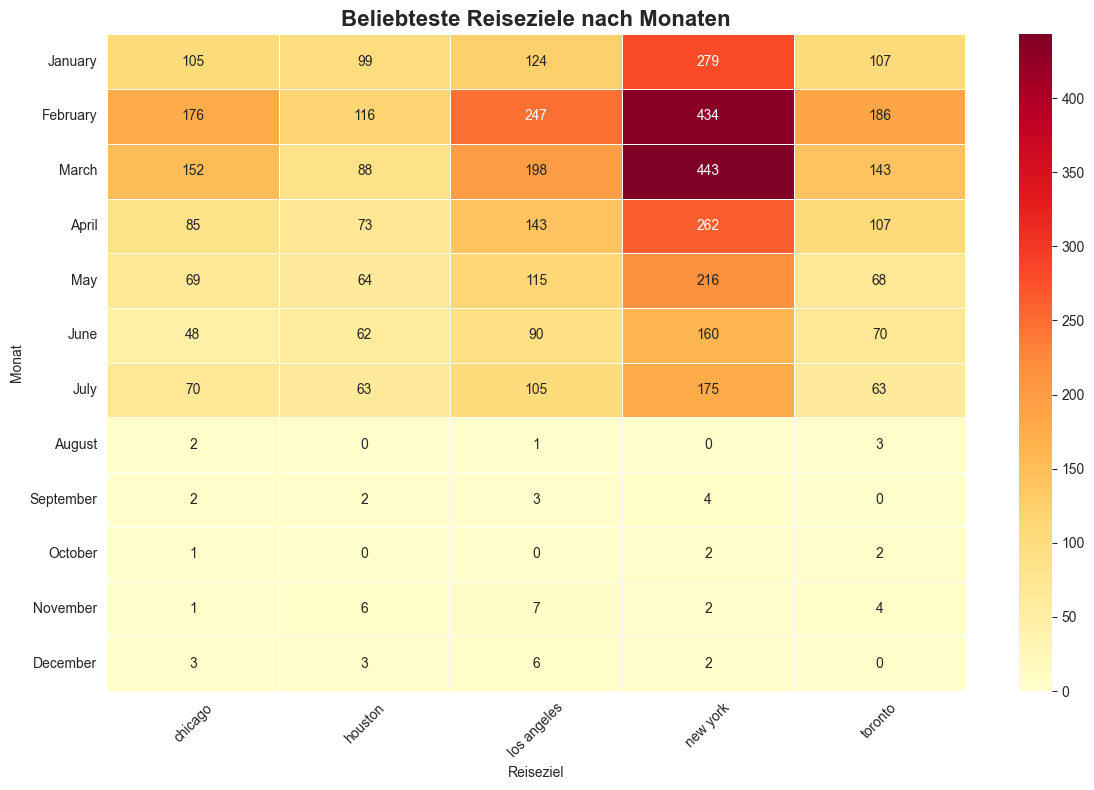

In [ ]:
# Heatmap: Monat vs. Destination für Top-5-Ziele
top_5_ziele = top_destinationen.head(5).index.tolist()
df_top5 = df_urlaub[df_urlaub['destination'].isin(top_5_ziele)]

heatmap_data = pd.crosstab(df_top5['urlaubs_monat'], df_top5['destination'])
heatmap_data = heatmap_data.reindex(monate_ordnung)

plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, fmt='d', cmap='YlOrRd', linewidths=0.5)
plt.title('Beliebteste Reiseziele nach Monaten', fontsize=16, fontweight='bold')
plt.xlabel('Reiseziel')
plt.ylabel('Monat')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()